# HARey constellation cards
Hans Augusto Reyersbach (pen name HARey) was an illustrator who wrote the book _Find the constellations_ to teach children about stargazing. In the book he remade the constellations drawing to be more similar to the objects they are named after. This project is my personal homage to HArey's work, and it borrows his idea of making learning the constellations a challenge by creating a Memory-like game to recognize the constellations without the lines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

## The project base
My project is based on Stellarium, an open source planetary software. In the Sky Culture section users can see different constellations shapes created by different cultures, and also the HARey drawings. I took the _index.json_ file containing the constellation lines and asterisms and the stars positions from the Hipparcos catalogues to draw the constellations.

In [2]:
from HARey_constellation_cards.astro_projection import Observer,stereographic_projection
from HARey_constellation_cards.loader import load_constellations, load_stars


_constellations_ is a dictionary that constains each constellations lines and stars. The key is an abbreviation of the constellation name (e.g., Ori for Orion). Constellations with keys like _.Orib_ are a subgroup of stars that are assigned a name by HARey (e.g. .Orib is the Orion's belt).

In [3]:
# Load the constellations  
constellations, main_ids, asterisms, helpers, named_stars, names = load_constellations('utilities/index.json', 'utilities/languages.csv')
# Load the stars positions and the constellations they belong to
stars = load_stars('utilities/hip_main.dat', constellations)

The stars are projected using a stereographic projection, which is a projection from a spherical surface to a plane which conserves the angles at which lines meet, preserving the shapes. The center of the projection is the brightest star of each constellation.

In [4]:
local_stars = stars[stars['constellation']=='Ori']
brightest_star = local_stars.iloc[np.argmin(local_stars['magnitude'])]
projection = stereographic_projection(brightest_star['ra'], brightest_star['dec'])

stars_x, stars_y = projection(stars['ra'], stars['dec'])

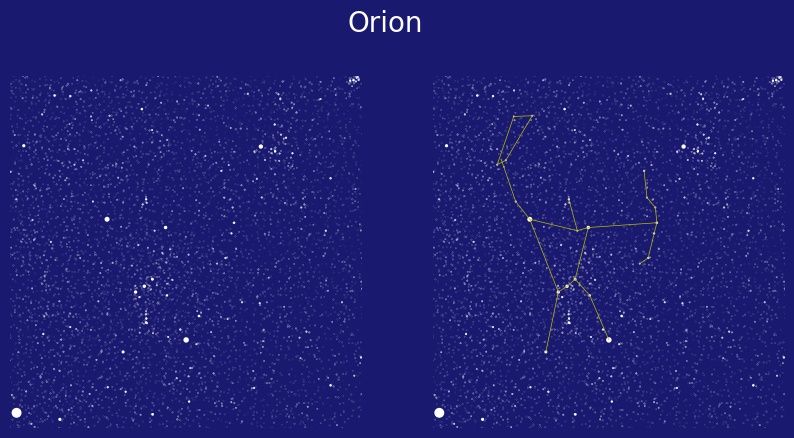

In [5]:

fig, (ax1, ax2) = plt.subplots(facecolor='midnightblue', ncols = 2, figsize=(10,5))
fig.suptitle('Orion', color='w', fontsize = 20)
ax1.set_aspect('equal')
ax1.set_axis_off()
ax1.set_xlim(-0.2,0.2)
ax1.set_ylim(-0.1,0.3)

# The stars size depends on their magnitude
ax1.scatter(stars_x, stars_y, s=10*10**(stars['magnitude']/-2.5), color='w')

ax2.set_aspect('equal')
ax2.set_axis_off()
ax2.set_xlim(-0.2,0.2)
ax2.set_ylim(-0.1,0.3)

# Plot the lines of the constellations Orion
for line in constellations['Ori']['lines']:
    ax2.plot(stars_x[line], stars_y[line], color='y', linewidth=0.5)
    
ax2.scatter(stars_x, stars_y, s=10*10**(stars['magnitude']/-2.5), color='w')
plt.show()

# The HARey module
The process of creating the constellations plots is automated by the HARey module. This creates plots that fit inside a playing card.
To make cards that can be used by everyone, I added the _languages.csv_ file, which contains the keys to identify the objects inside the HARey module and the translated names. The default language is COMMON, which is the standard IAU denomination of objects. ENGLISH uses the names used by HARey in his book. The names also includes newlines when the names are too long (this works in the MAtplotlib plots but not the SIS scripts).

In [6]:
from HARey_constellation_cards.HARey import HARey

In [7]:
# Read the constellations file, the HIP catalogue and the object names
harey = HARey(language='ITALIANO')

# Set two custom fonts for the plots and the cards names
harey.set_fonts('utilities/fonts/CaveatBrush-Regular.ttf', 'utilities/fonts/TheWalkyr.ttf')

# Using a card template different than the default one
#harey.set_card_template('tarot-square', cardback_file= 'utilities/cardbacks/tarot_square.png')

Loading constellations diagrams....     Done!
Loading star coordinates....     Done!
Loading custom markers....       Done!
Using the tarot-round format, 2.75x4.75 in
Using Caveat Brush for plot labels
Using The Walkyr for card names


Here are the custom labels for the stars that I created, based on the ones used by HARey. Stars even fainter are plotted as simple dots with dimensions depending on the magnitude (I took this idea from the skychart repository on Github).

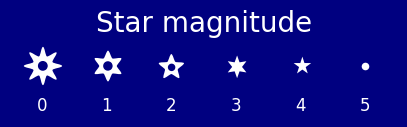

In [8]:
harey.plot_legend()

## Plotting options
The following functions share most of these FLAGS to enable or disable plotting options:
- __LINES__ : Plot the constellation lines
- __ASTERISMS__ : Plot the asterisms lines. Asterisms are patterns of stars that are easy to recognize but not a constellation (e.g. the Big Dipper)
- __HELPERS__ : Plot the helper lines. These are imaginary lines that connect stars to each other and make it easier to find features in the sky (in the sky the lines are pretty much straight, in the plots this doesn't happen due to deformations and the fact that are described as a polyline)
- __CONSTELLATION_NAMES__ : Show the constellation names
- __CONSTELLATION_PARTS__ : Show the constellation parts (e.g. feet, head, ecc.) from the HARey drawings
- __STAR_NAMES__ : Plot the brightest stars names
- __SHOW__ : Show the image (default True)
- __SAVE__ : Save the figure
- __SIS_SCRIPT__ : Creates a Simple InkScape Script for the labels. See the next section.



## The SIS_SCRIPT option
Plotting the labels proved a more difficult task than expected as there is no simple way to put the labels without overlapping other labels or objects. I've tried the python libraries adjustText and textalloc that fix this issue by moving each label away and then try to dynamically simulate their movement towards their initial position while avoiding everything else, but found that it took too long to simulate the movements and the result was not satisfactory.

For this reason I decided to manually fix the labels to get the best result possible. To simplify this tedious task, I used InkScape with the extension Simple Inkscape Scripting, which enables python-like scripts to perform repetitive tasks in InkScape, to automatically plot all the labels as text fields that can be manipulated. 

To do this, enable the SIS_SCRIPT flag and a new _image_name.py_ file will be created inside the folder inkscape_scripts containing the labels informations. Now open the image (saved without labels) in Inkscape and resize the canvas to the image (file-> Document Properties -> Resize to content). Then go to Extensions -> Render -> Simple InkScape Scripting and select the _image_name.py_ file and launch it with Apply. All the labels will appear in the image in the right position and color (but no newlines, sorry), and fixing them will hopefully require only some resizing and a small traslation.

## Constellations cards
The constelllations are projected around the brightest star using a stereographic projection that preserves the shapes.

 When the __BEST_AR__ flag is enabled, the stars are rotated to minimize the aspect ratio (x-spread over y-spread) and fill as much as possible the card space. Otherwise, the card is plotted North up. Stars that are not part of the constellations are plotted with a little transparency to make it easier to see the constellation.

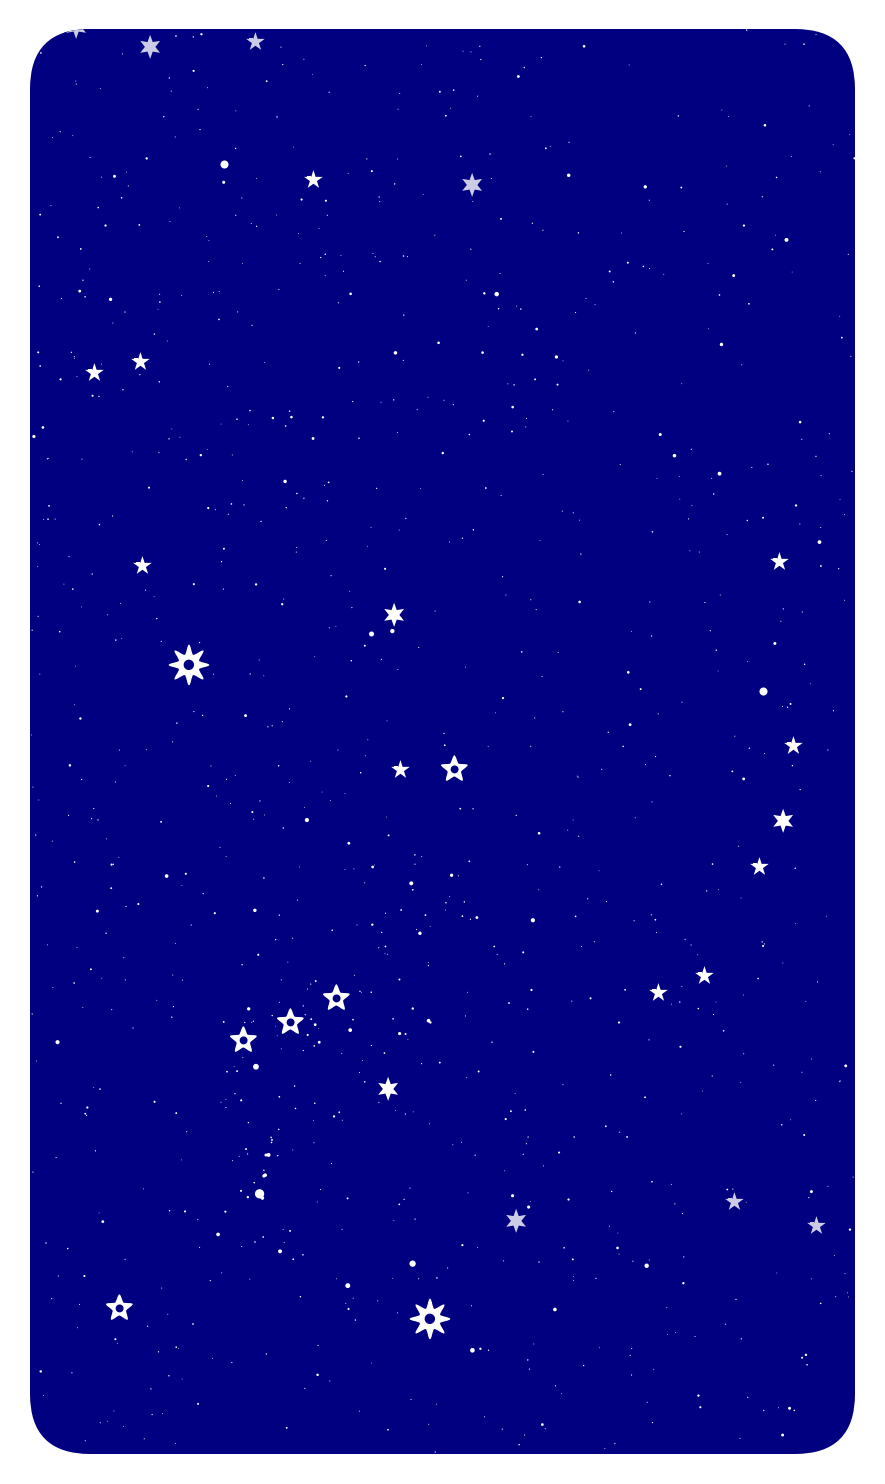

In [9]:
harey.plot_card('Ori', LINES=False, BEST_AR=True, SAVE=False)


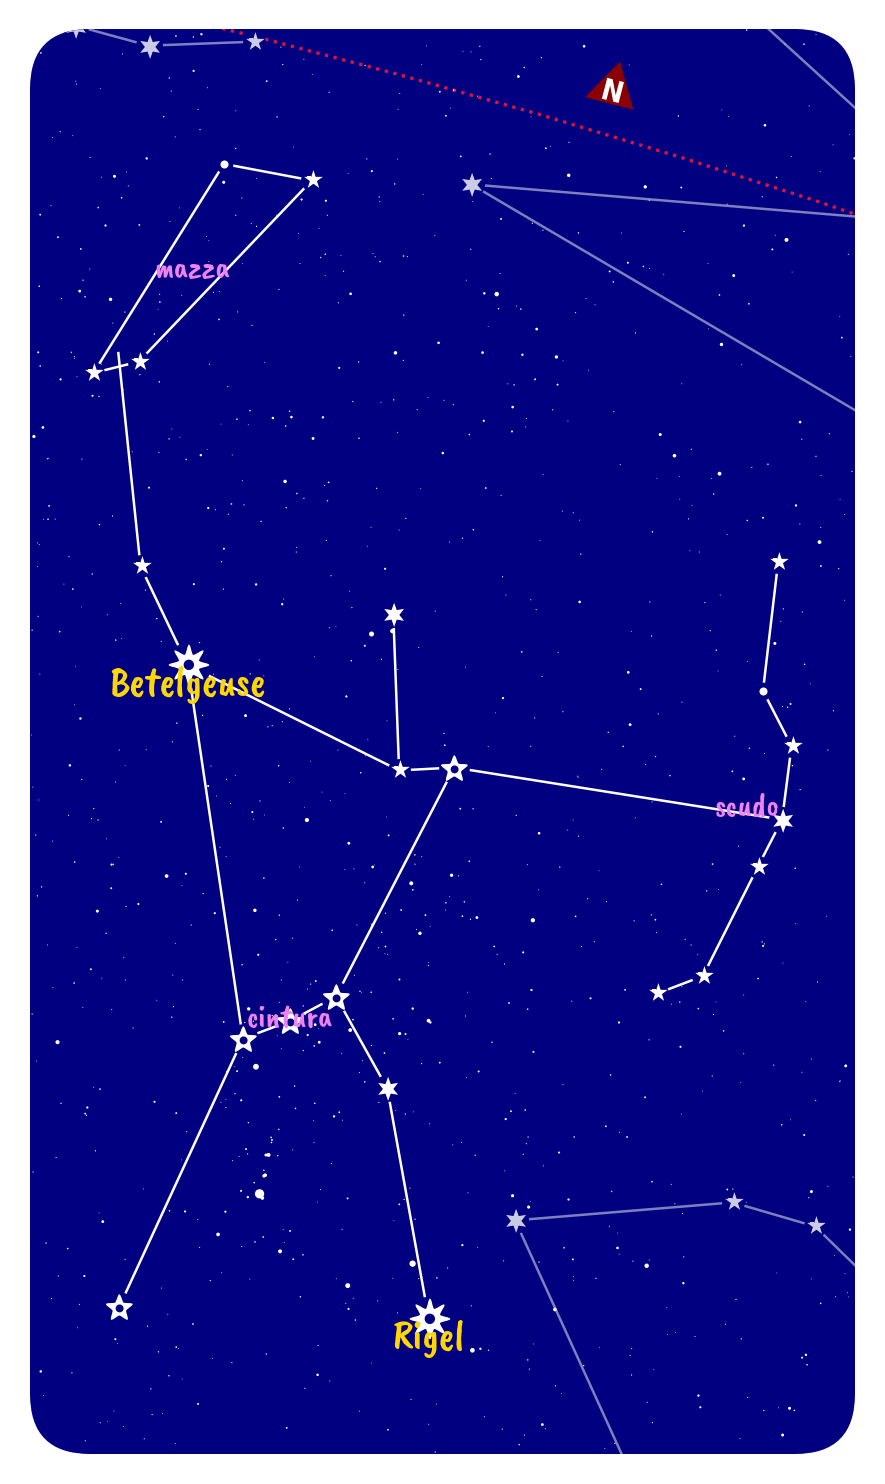

In [10]:
harey.plot_card('Ori', LINES=True, BEST_AR=True, SAVE=False, SIS_SCRIPT=True, CONSTELLATION_PARTS = True, STAR_NAMES=True)

__write_cardback__ creates the cardback for the constellations, colorizing the bw image of the cardback and adding the name of the constellation.

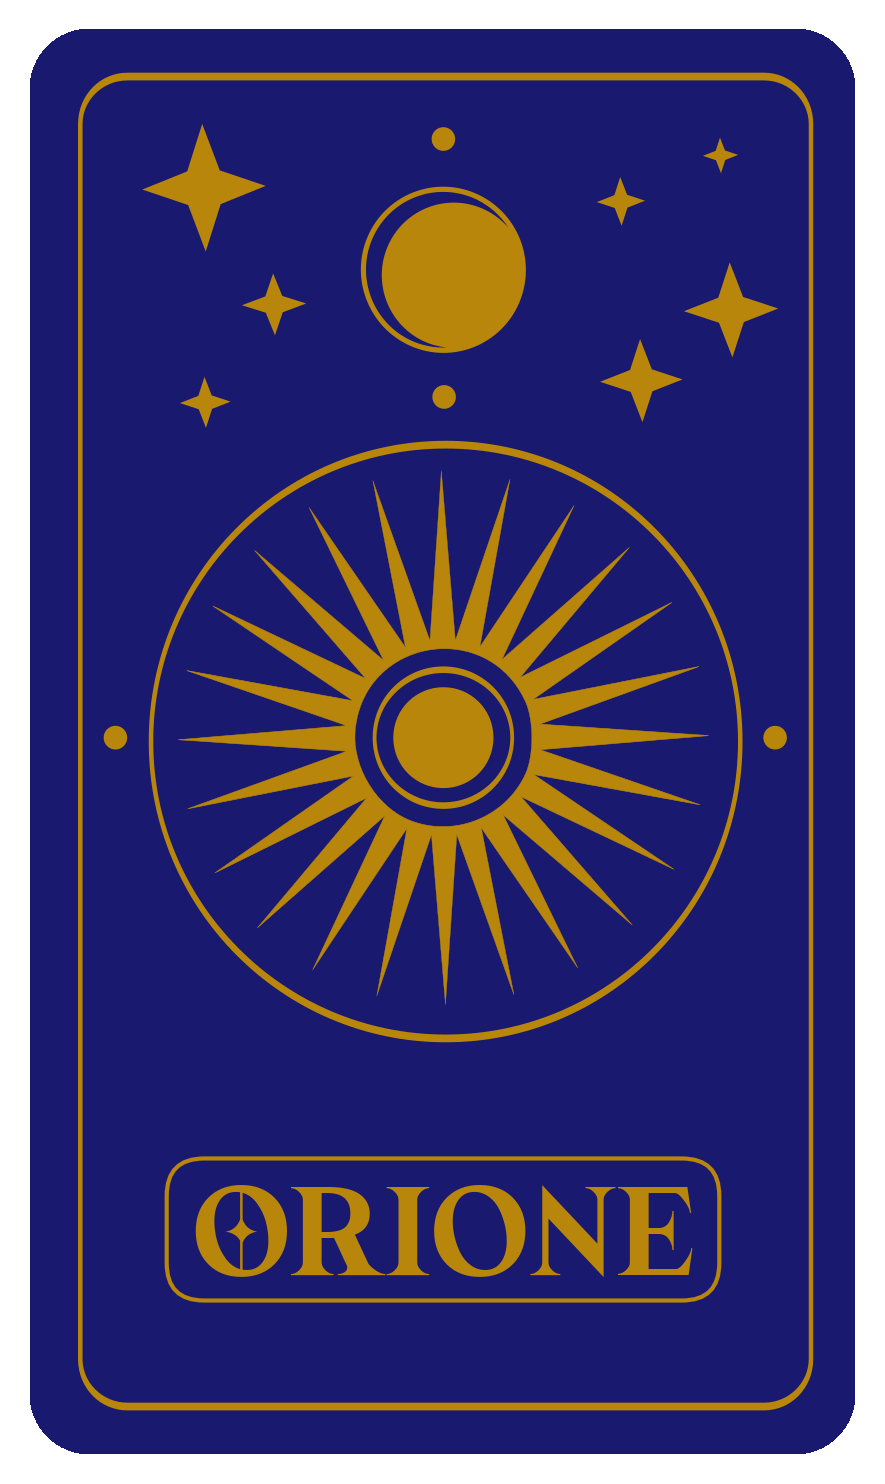

In [11]:
harey.write_cardback('Ori')

## Printing the cards
The actual print is done by first creating all the sets inside a folder, the using the print-and-play method to arrange all the cards inside a pdf. __print_card_set__ creates a card set for one constellation (an image of the constellation without lines, one with lines, and two different cardbacks)

In [12]:
plot_constellations = ['Ori', 'Gem', 'Tau', 'UMa']

for id in plot_constellations:
	print(f'Creating card set for {harey.names[id].replace('\n', ' ')} ({id})')
	harey.print_card_set(id, save_folder='Card_output', SIS_SCRIPT=True, bleed=0.2)
	


Creating card set for Orione (Ori)
Creating card set for Gemelli (Gem)
Creating card set for Toro (Tau)
Creating card set for Orsa Maggiore (UMa)


__print_and_play__ arranges the cards inside the folder in a pdf document ready to print. The print is inteded to be 2-sided, and to avoid small misalignement between the fronts and the backs of the cards, the latters have been saved with a bleed of 0.2 inches, i.e. an extra area with the background color that completely covers the card fronts, where the cutting should tahe place. 

In [13]:
harey.print_and_play(folder = 'Card_output', filename='Cards.pdf')


16 cards have been printed in the file Cards.pdf



## Plotting a star map for a given latitude and time
The __plot_sky_view__ method creates an alt-az view of the sky at a given time and location.

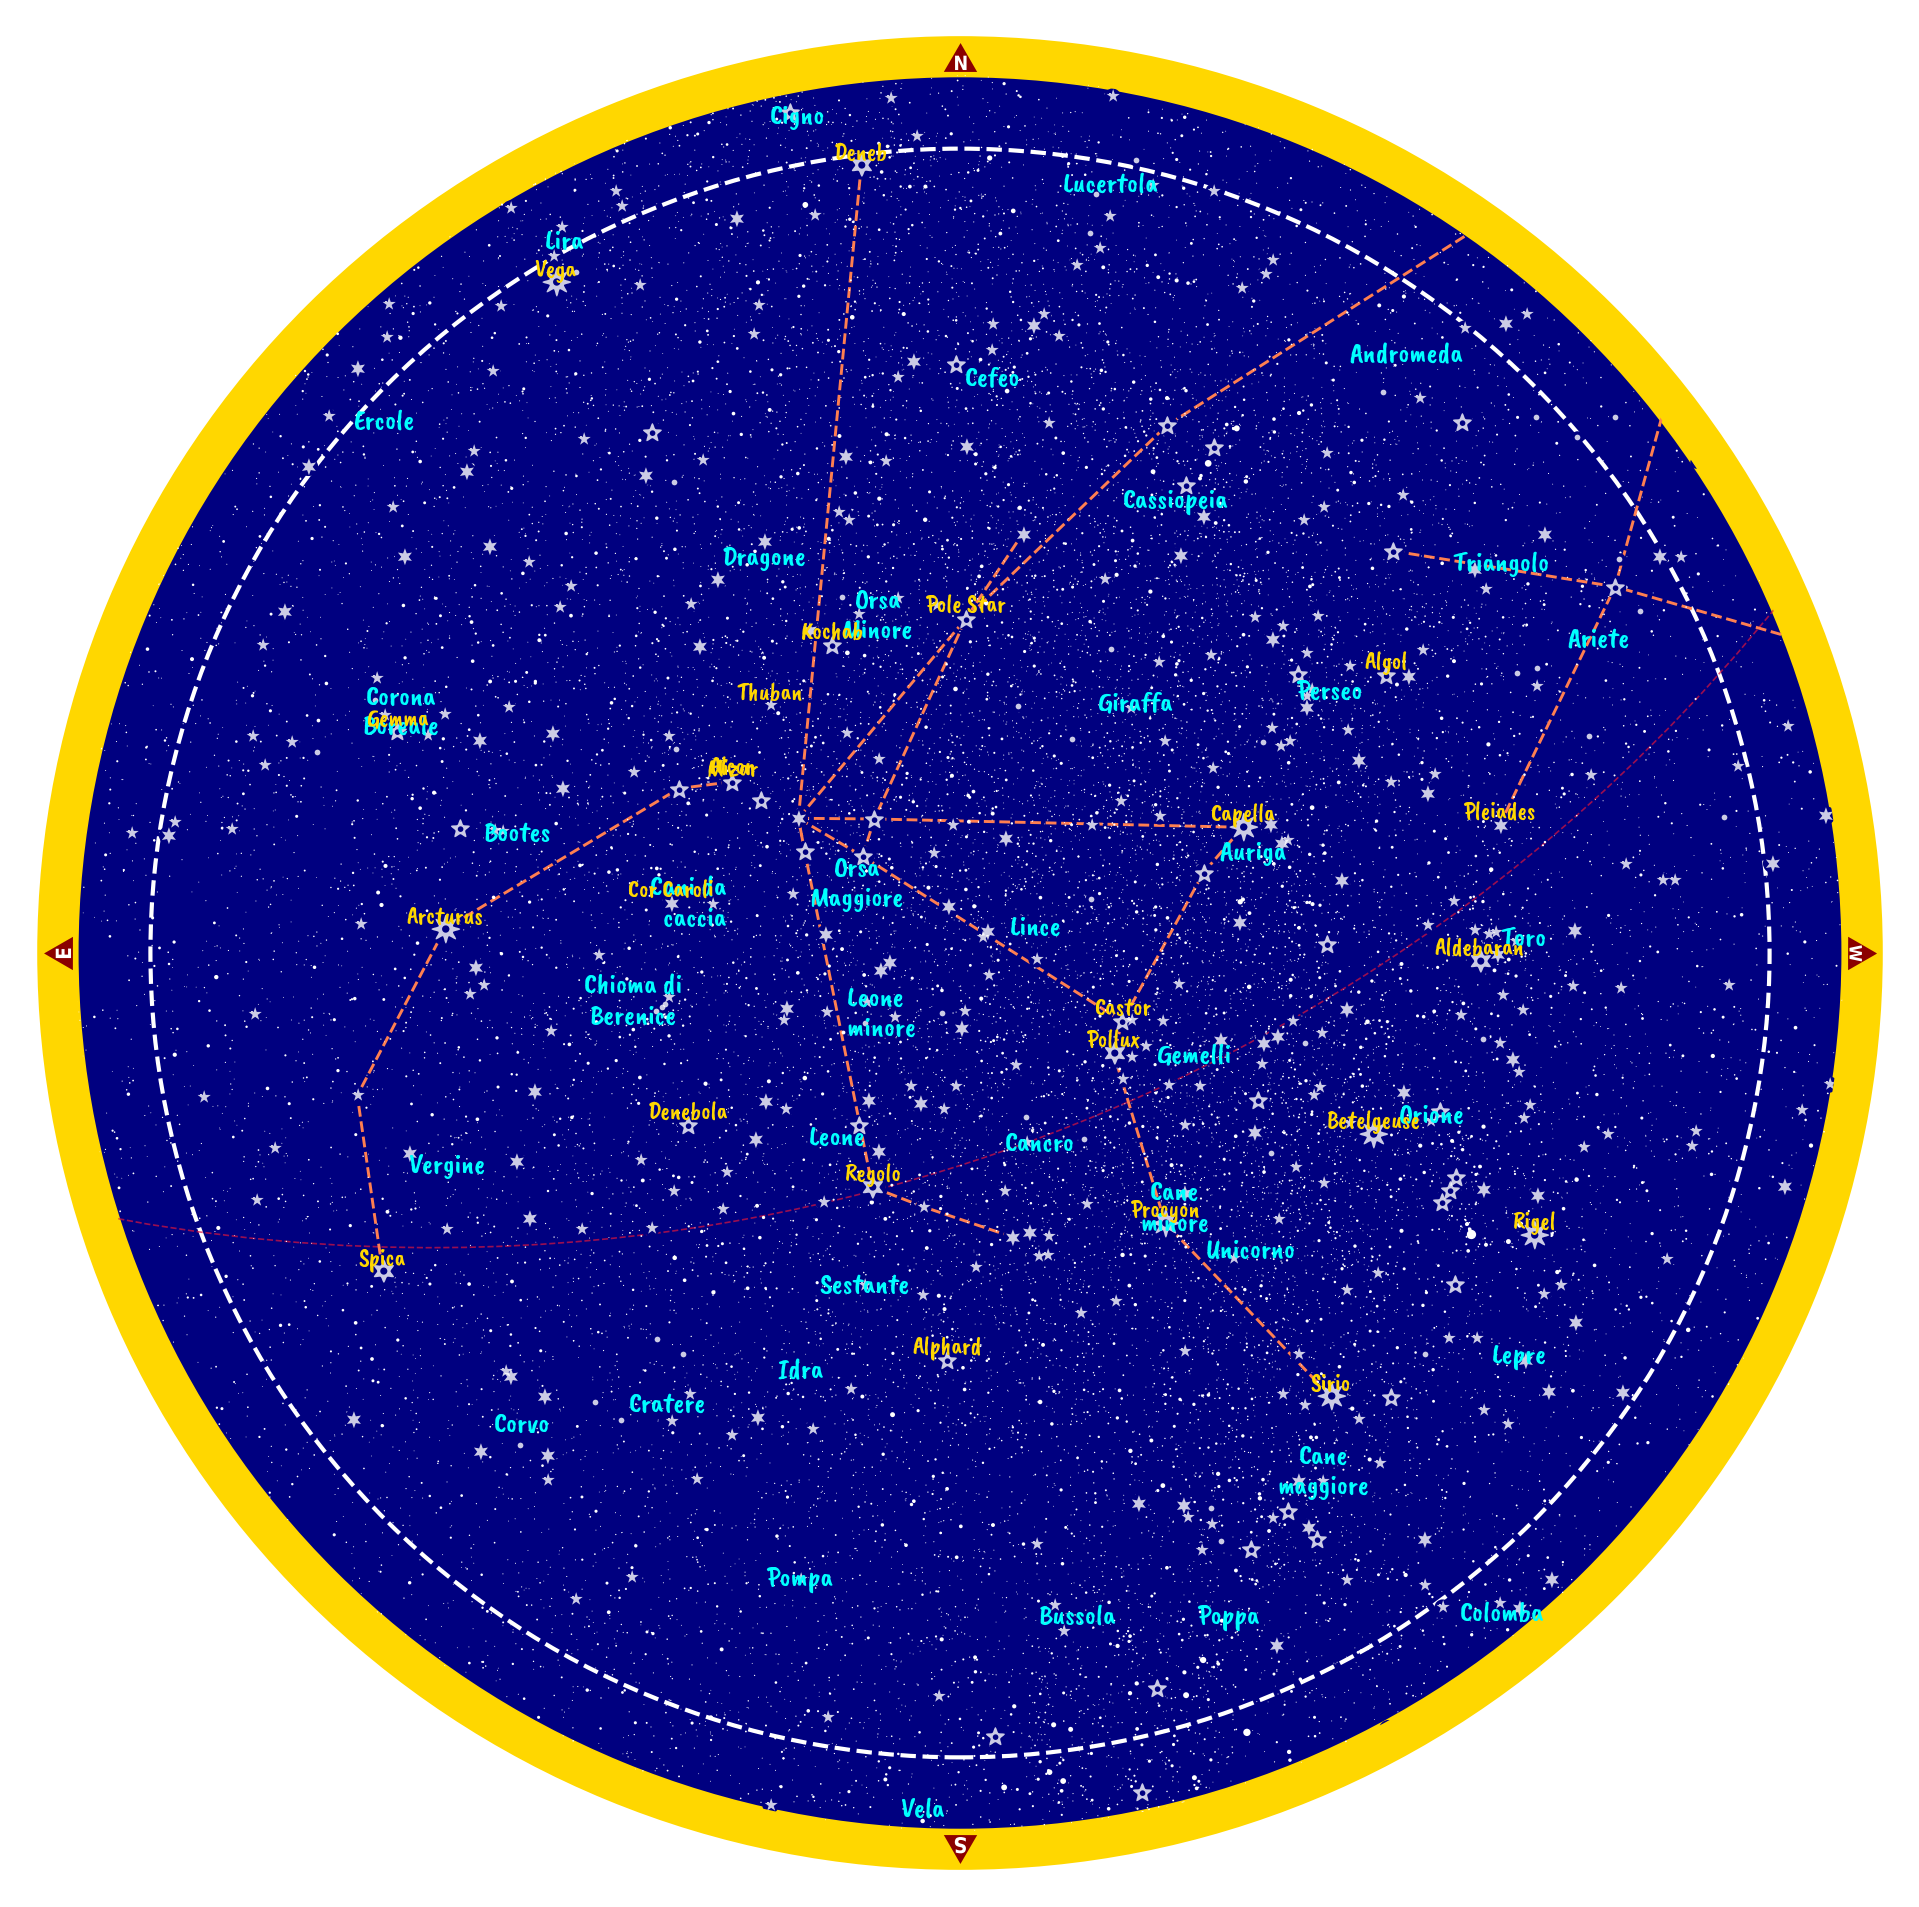

In [14]:
datetime_str = '27-3-2025 21:30'

date = datetime.strptime(datetime_str, '%d-%m-%Y %H:%M')
# Observer takes as input the latitude and longitude in decimal format (not sessagesimal)
observer = Observer('45 N','11 E')
observer.at_time(date, pytz.timezone('Europe/Rome'))
harey.plot_sky_view(observer, LINES=False, HELPERS=True, STAR_NAMES=True)


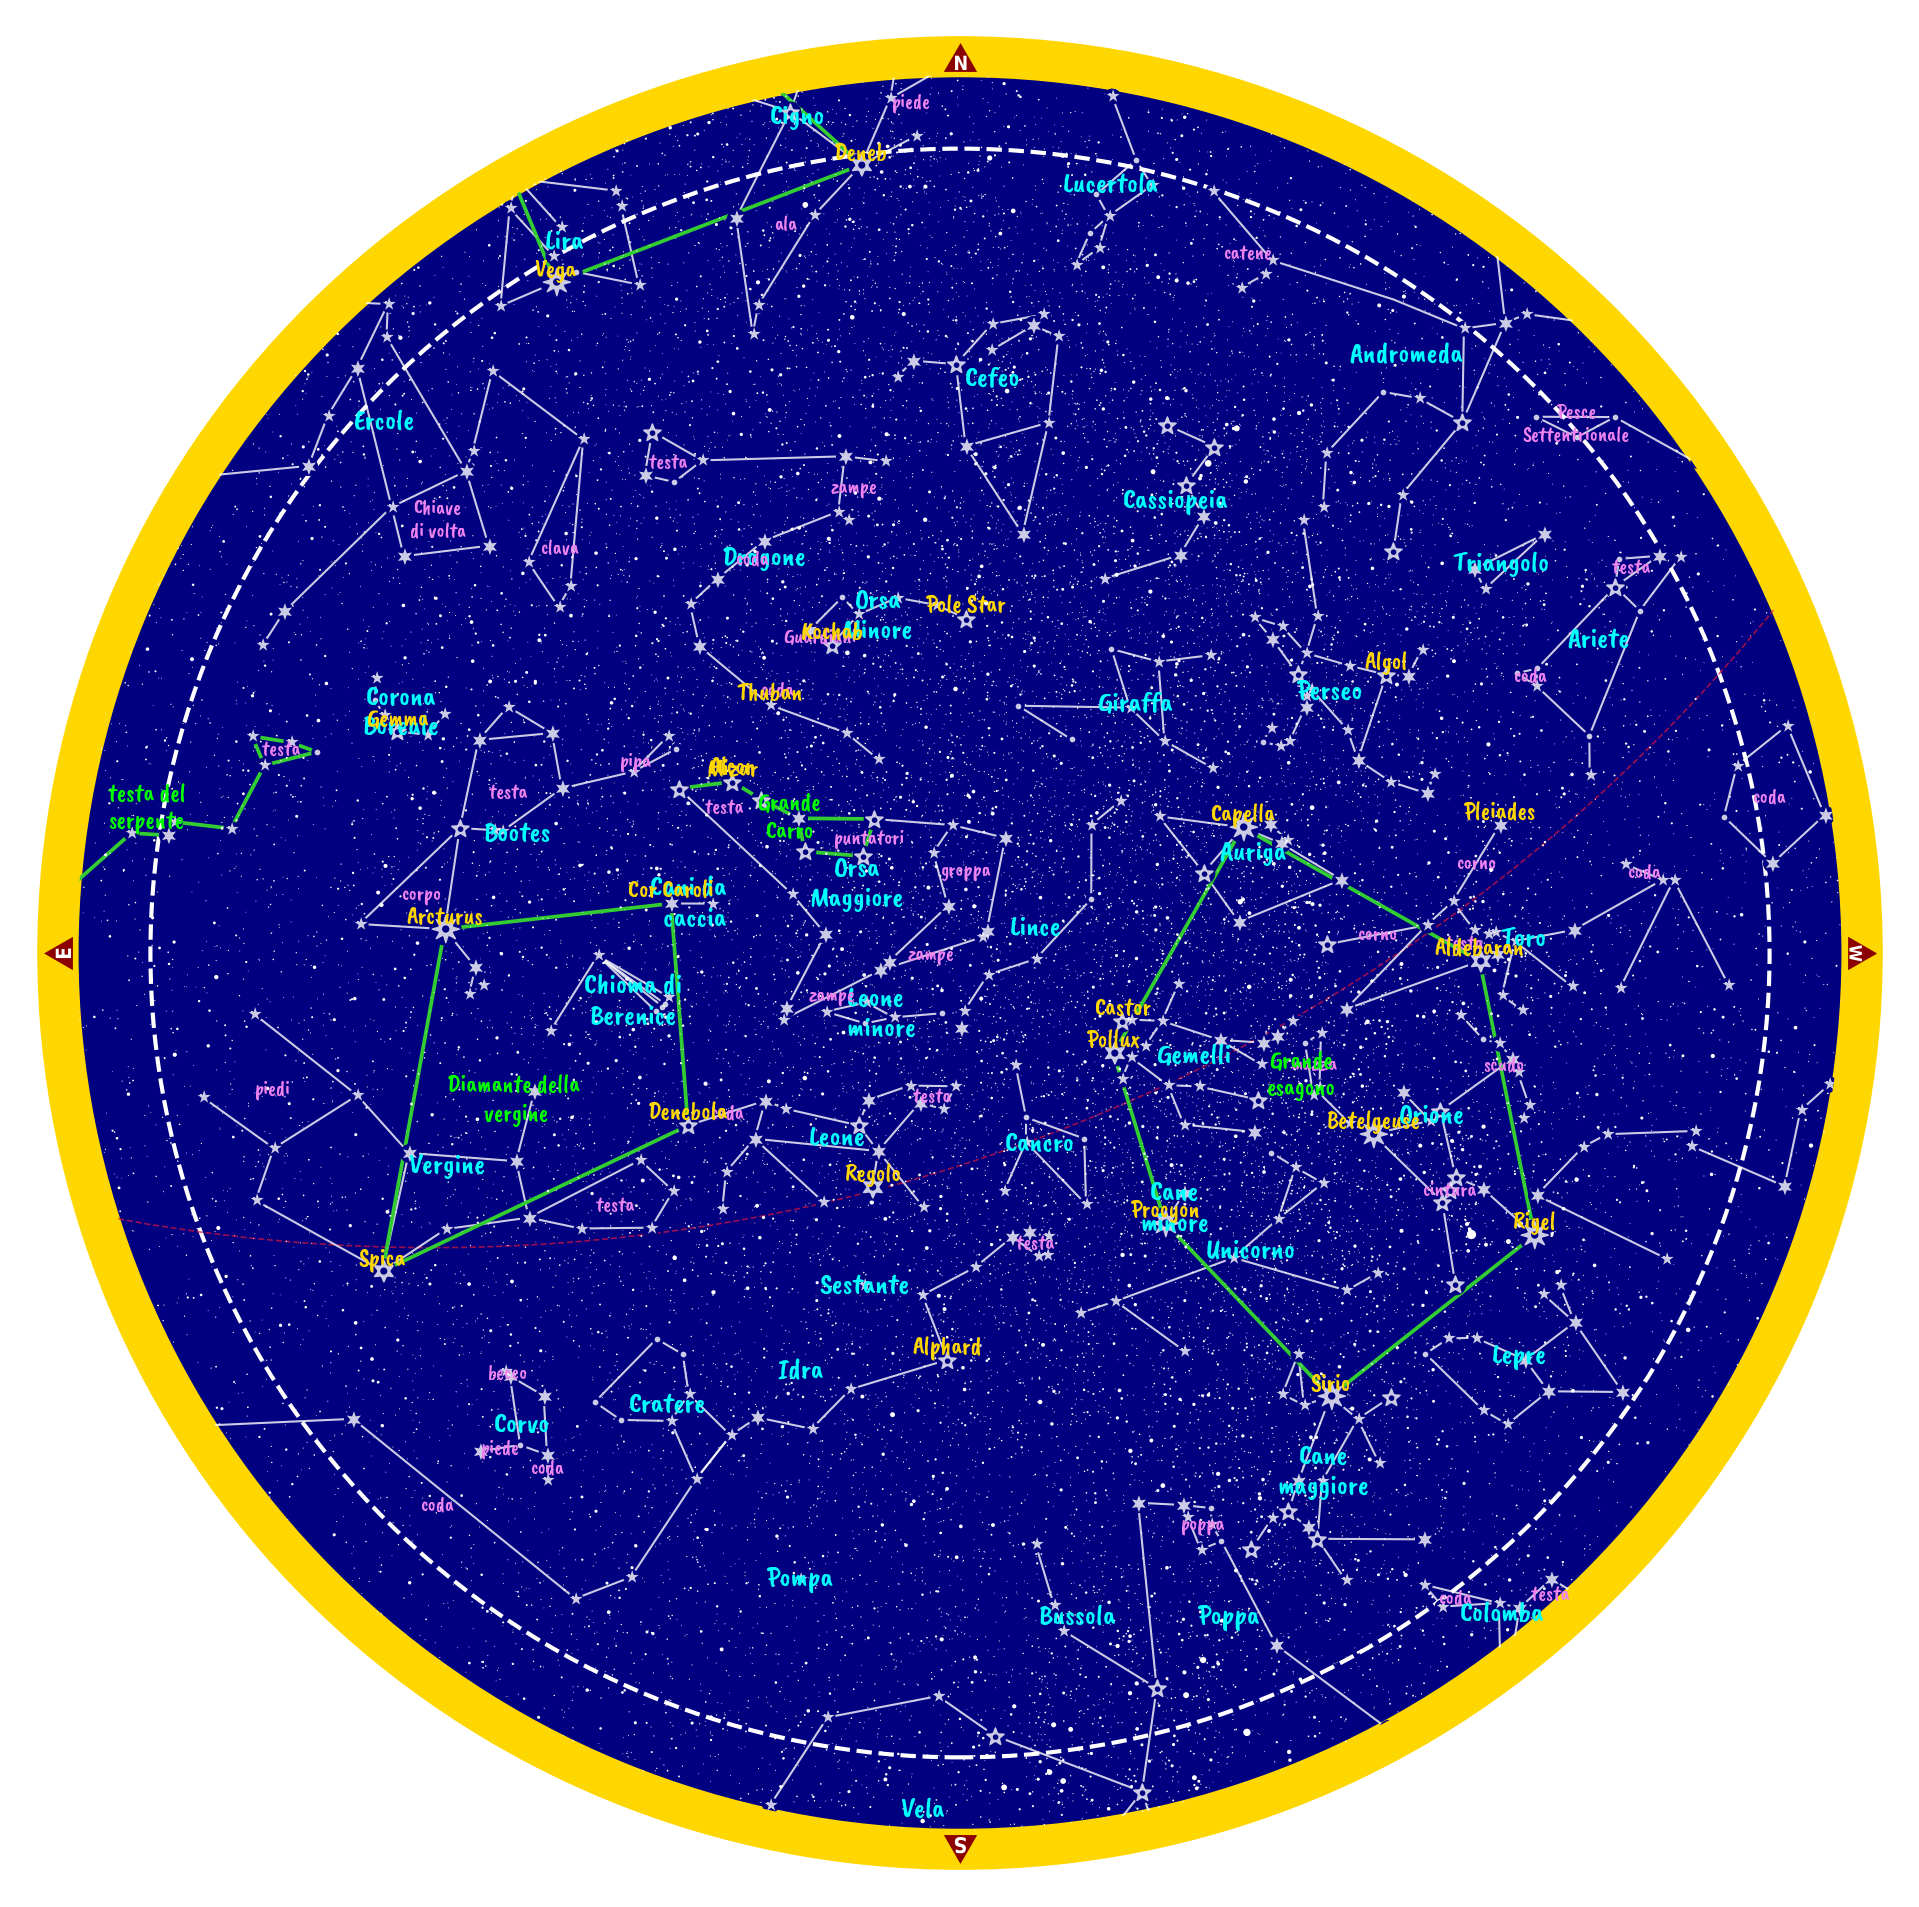

In [15]:
harey.plot_sky_view(observer, LINES=True, CONSTELLATION_NAMES=True, STAR_NAMES=True, CONSTELLATION_PARTS=True, HELPERS=False, ASTERISMS=True, font_sizes=(5,6,7), SIS_SCRIPT=True)

## Universal map of the sky
The universal map of the sky is divided in an equatorial map and two polar maps to reduce the deformations caused by projecting. The equatorial map uses the Gall stereographic projection, which compromises bewtween deformations of areas and angles minimize both. The polar projections instead use a stereographic projection, which preserves angles but deforms areas moving away from the center.

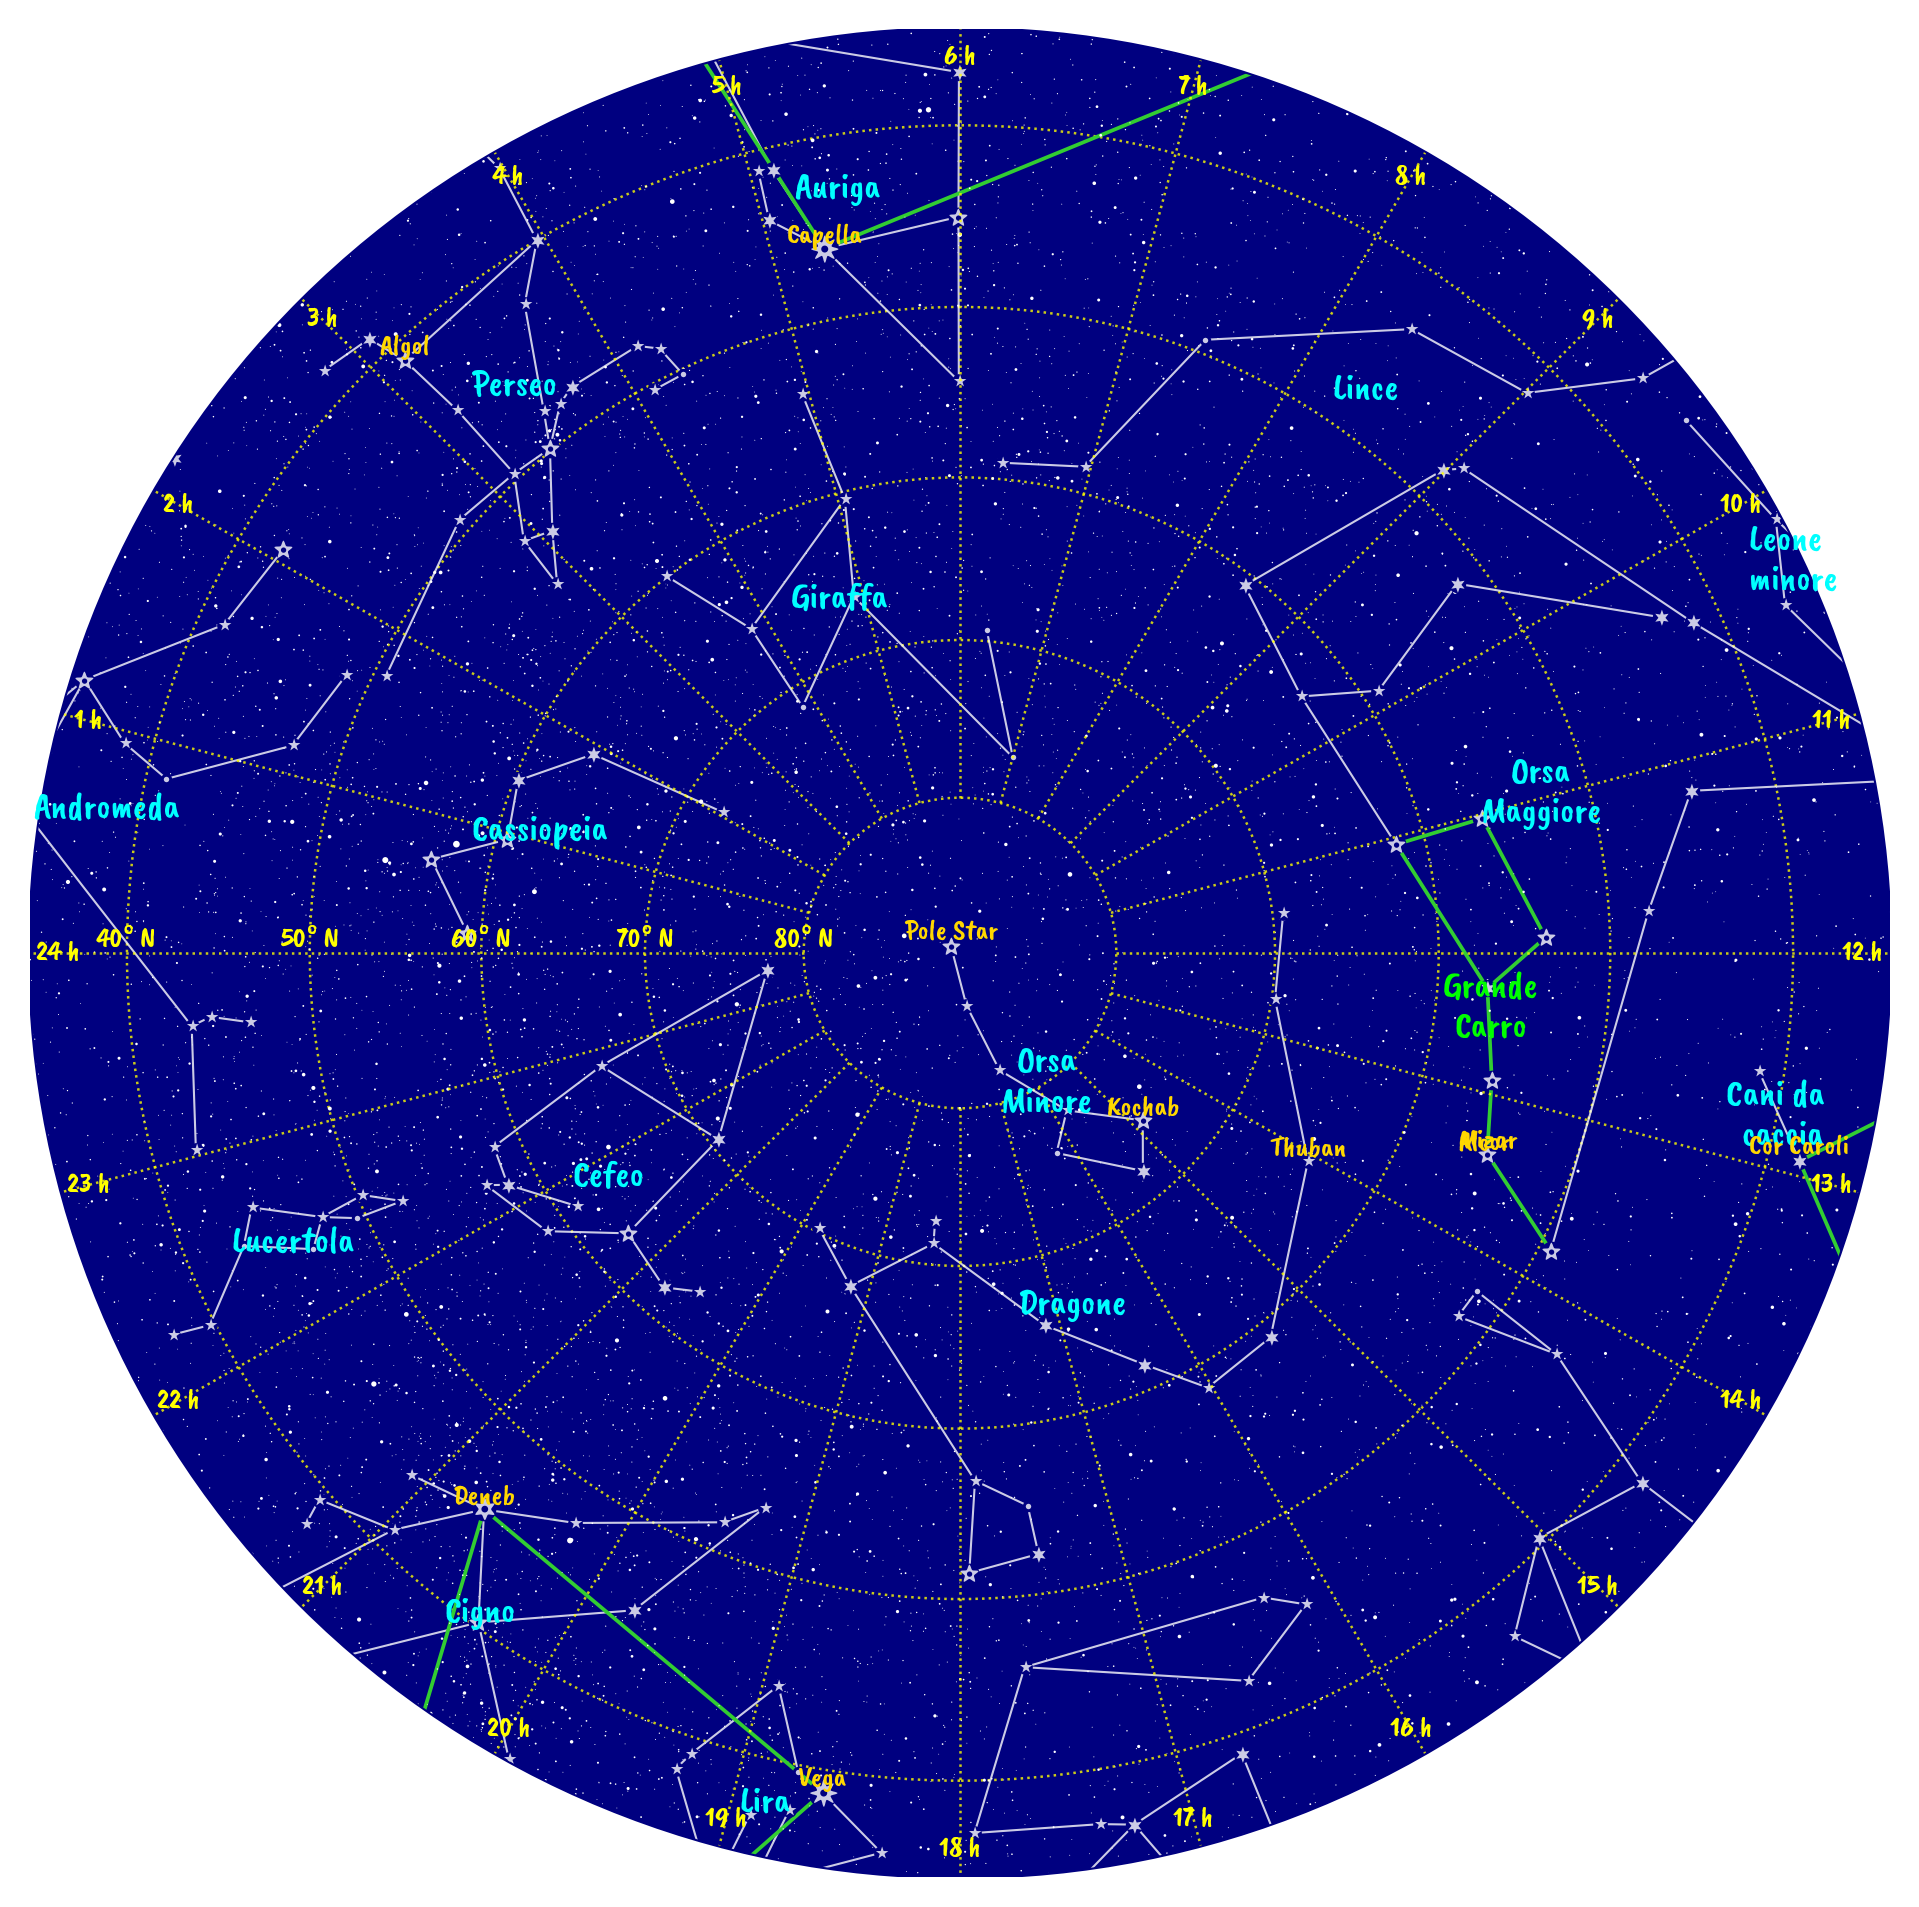

In [16]:
harey.polar_map(pole = 'N', FOV= 110, LINES=True, GRID=True, CONSTELLATION_NAMES = True, ASTERISMS= True, STAR_NAMES = True, font_sizes=(7,8,9), SIS_SCRIPT=True)

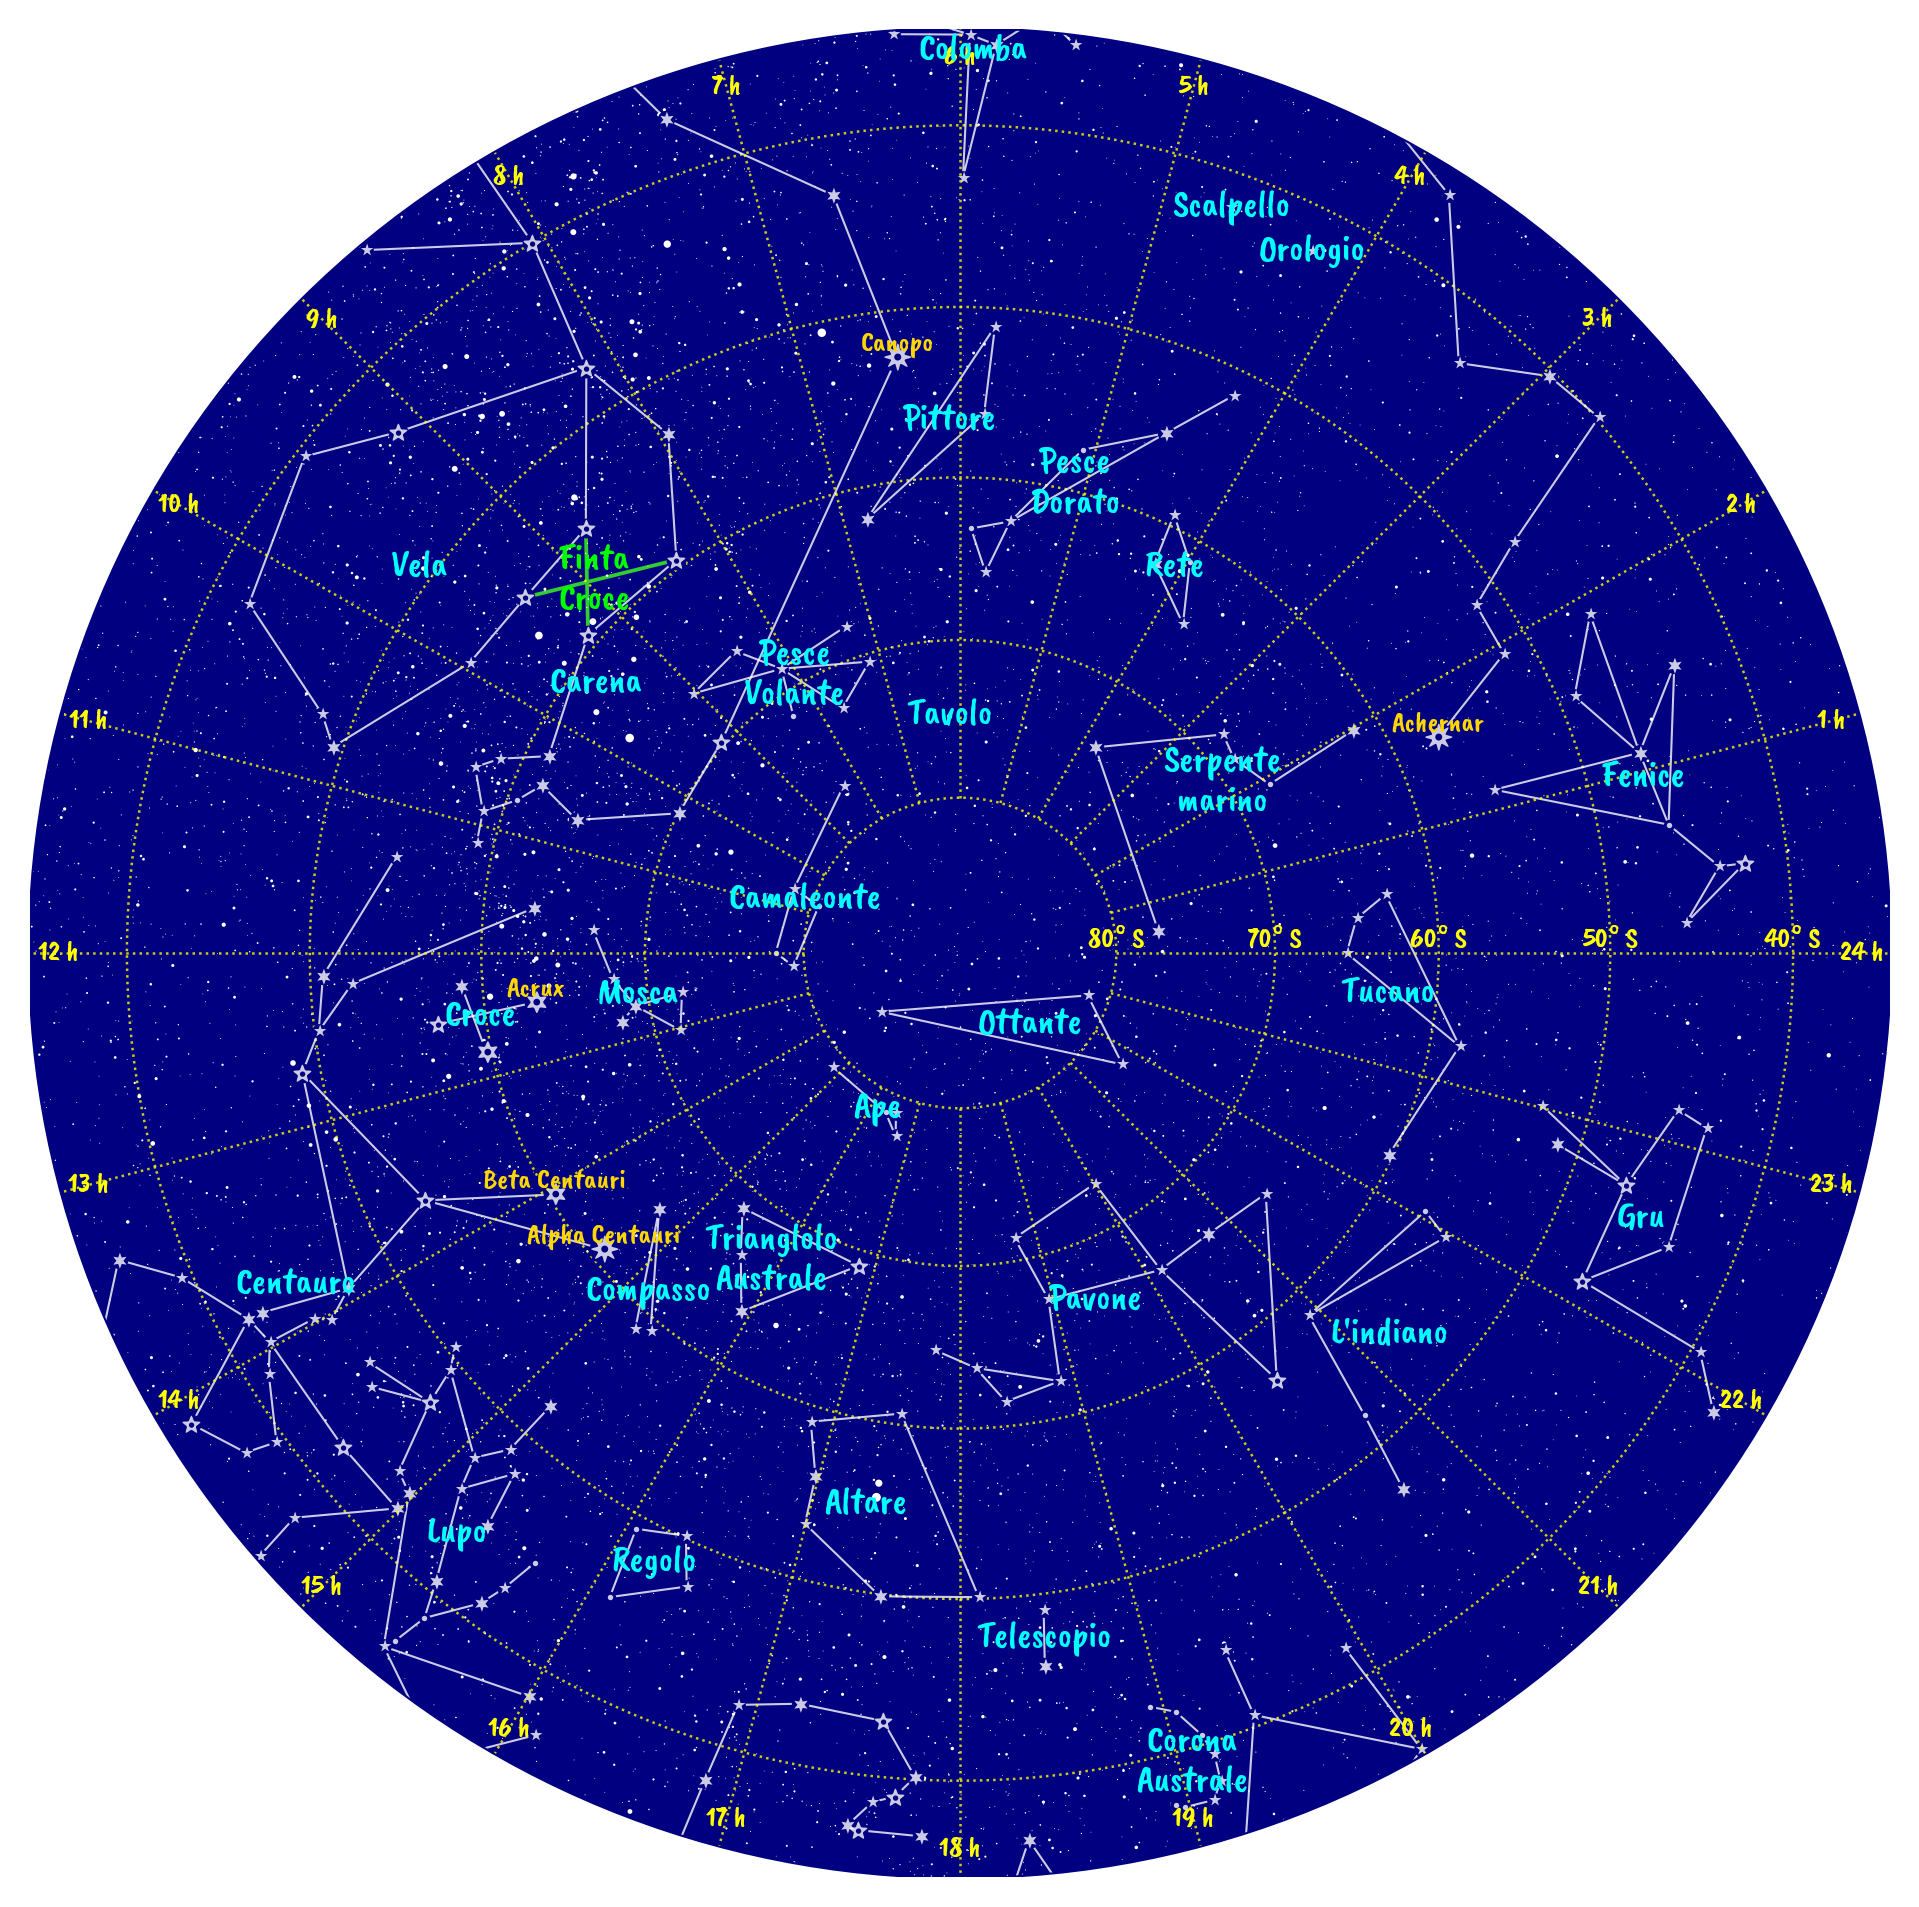

In [17]:
harey.polar_map(pole = 'S', FOV= 110, LINES=True, GRID=True, CONSTELLATION_NAMES = True, ASTERISMS= True, STAR_NAMES = True, font_sizes=(7,8,9))

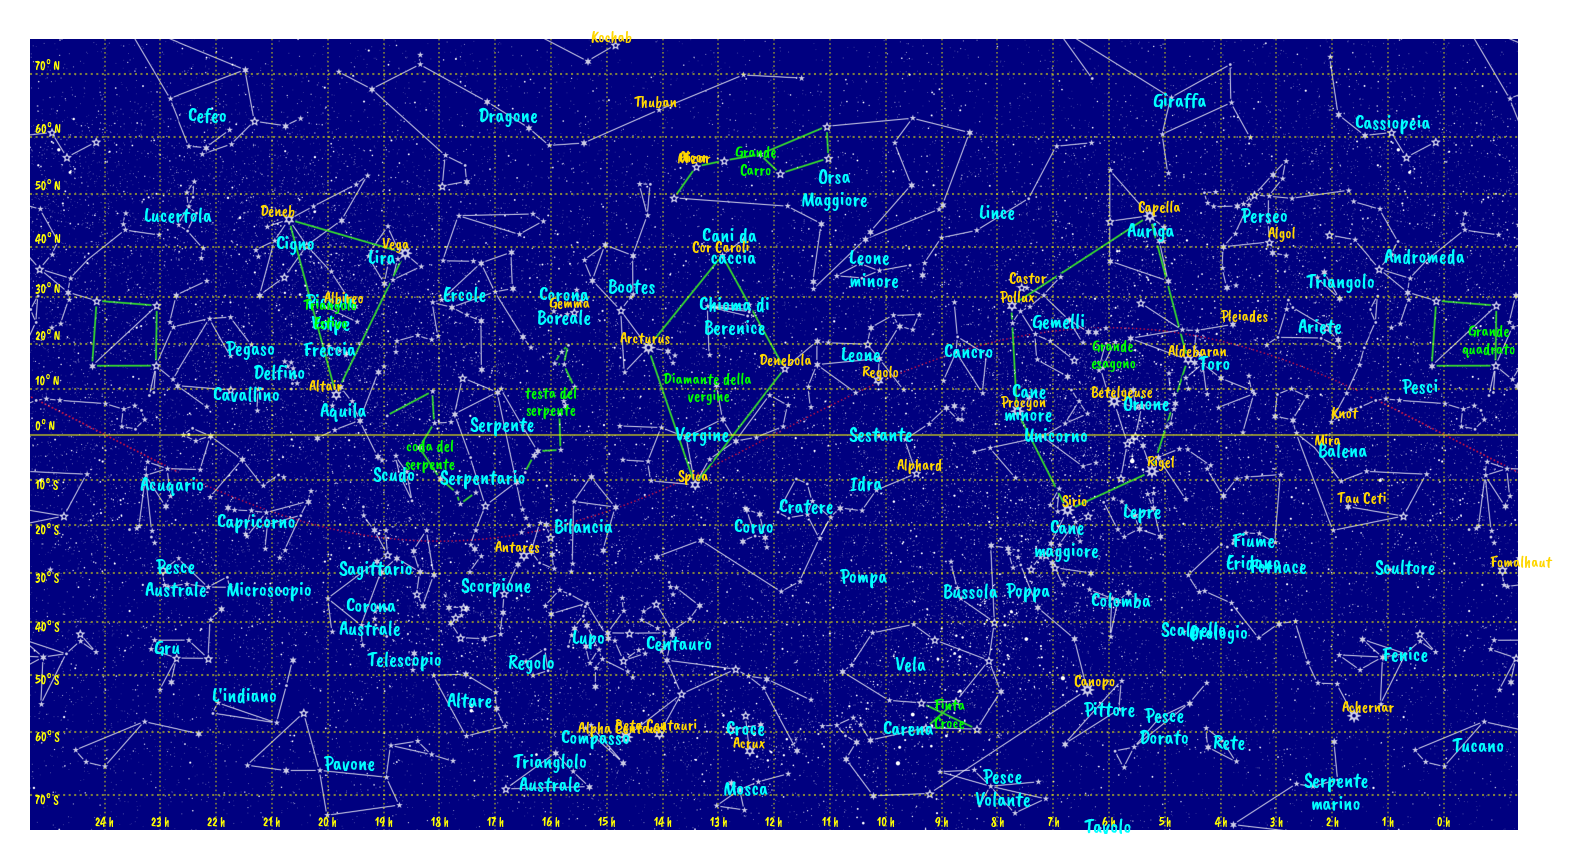

In [18]:
harey.equatorial_map(max_dims=(10,8), LINES=True, GRID= True, STAR_NAMES=True, CONSTELLATION_NAMES=True, ASTERISMS=True, font_sizes=(3,4,5))